In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

relax

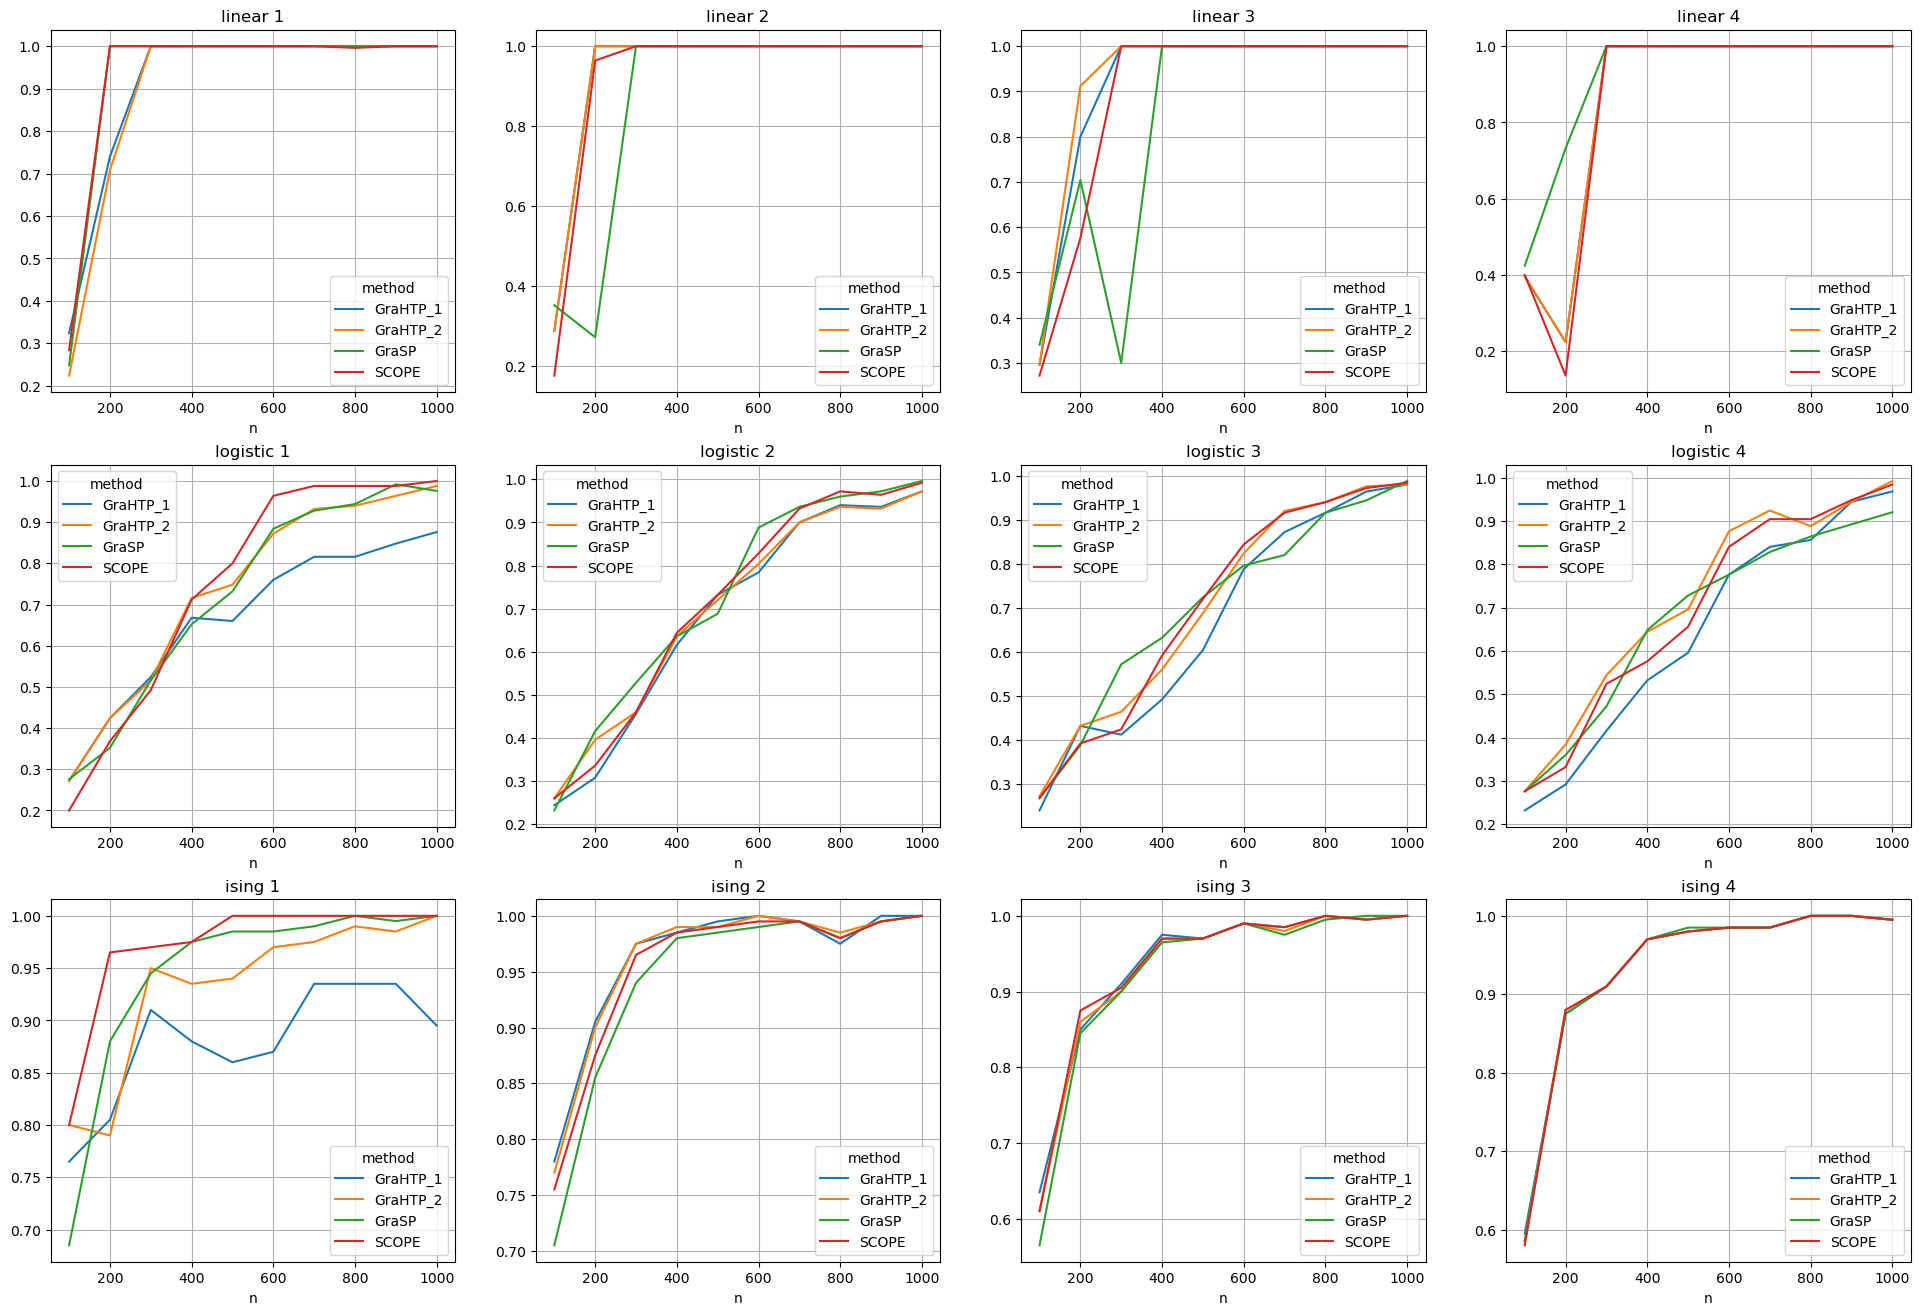

In [2]:
df = pd.read_csv("total_relax_sparsity-2.csv")
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 16))
for i, model in enumerate(["linear", "logistic", "ising"]):
    for j, relax_ratio in enumerate([1,2,3,4]):
        df[(df["model"] == model)&(df["relax_ratio"]==relax_ratio)].groupby(['n', 'method'])["accuracy"].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + str(relax_ratio),
            grid=True,
        )

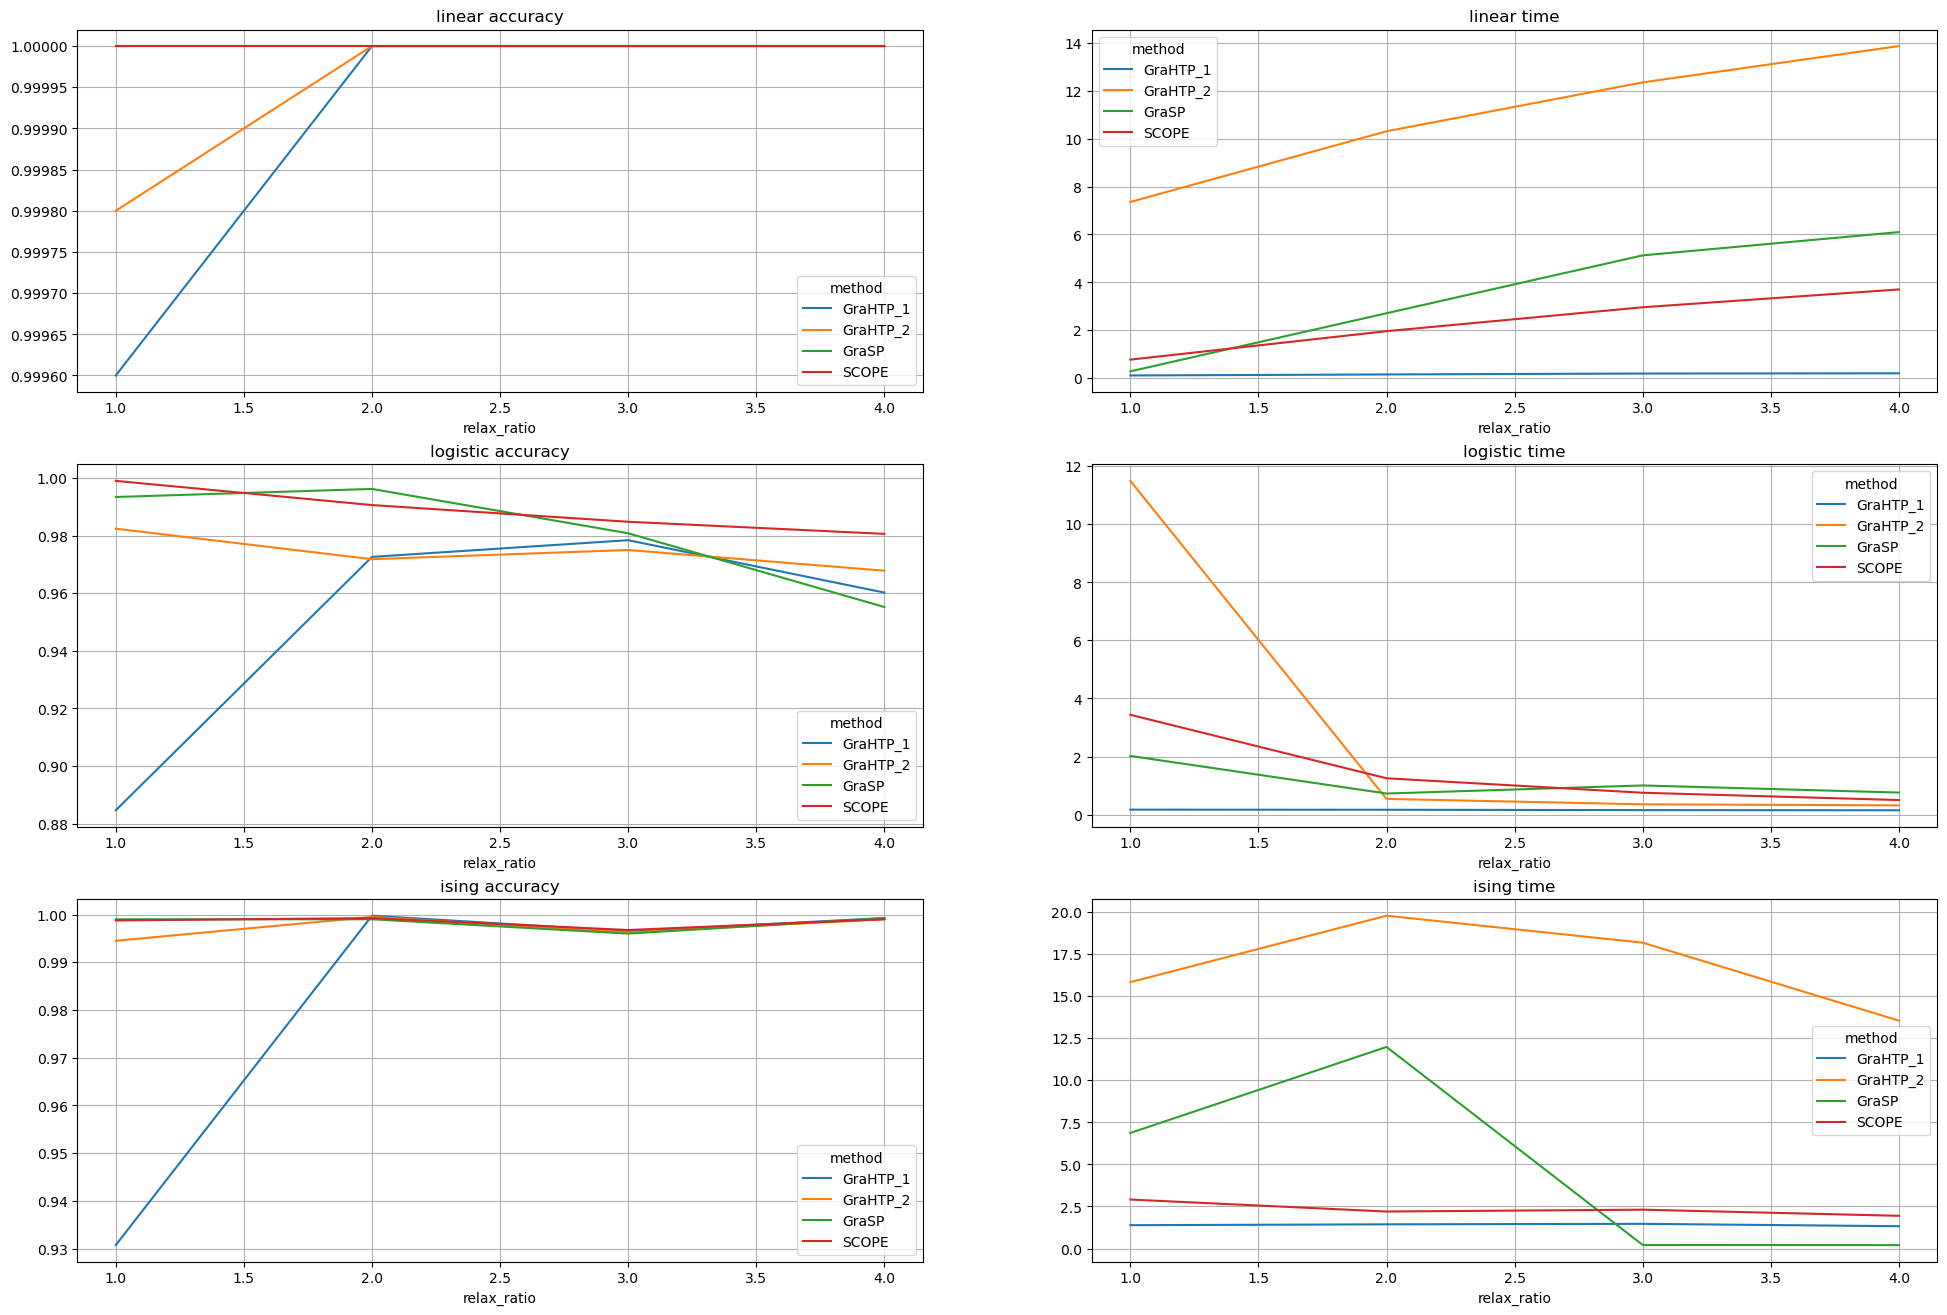

In [6]:
df = pd.read_csv("relax_sparsity.csv")
df = df[df.n == 1000]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 16))
for i, model in enumerate(["linear", "logistic", "ising"]):
    #for j, method in enumerate(["SCOPE", "GraSP", "GraHTP_1", "GraHTP_2"]):
    for j, metric in enumerate(['accuracy', 'time']):
        df[(df["model"] == model)].groupby(['relax_ratio', 'method'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title=model + " " + metric,
            grid=True,
        )                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

scope relax

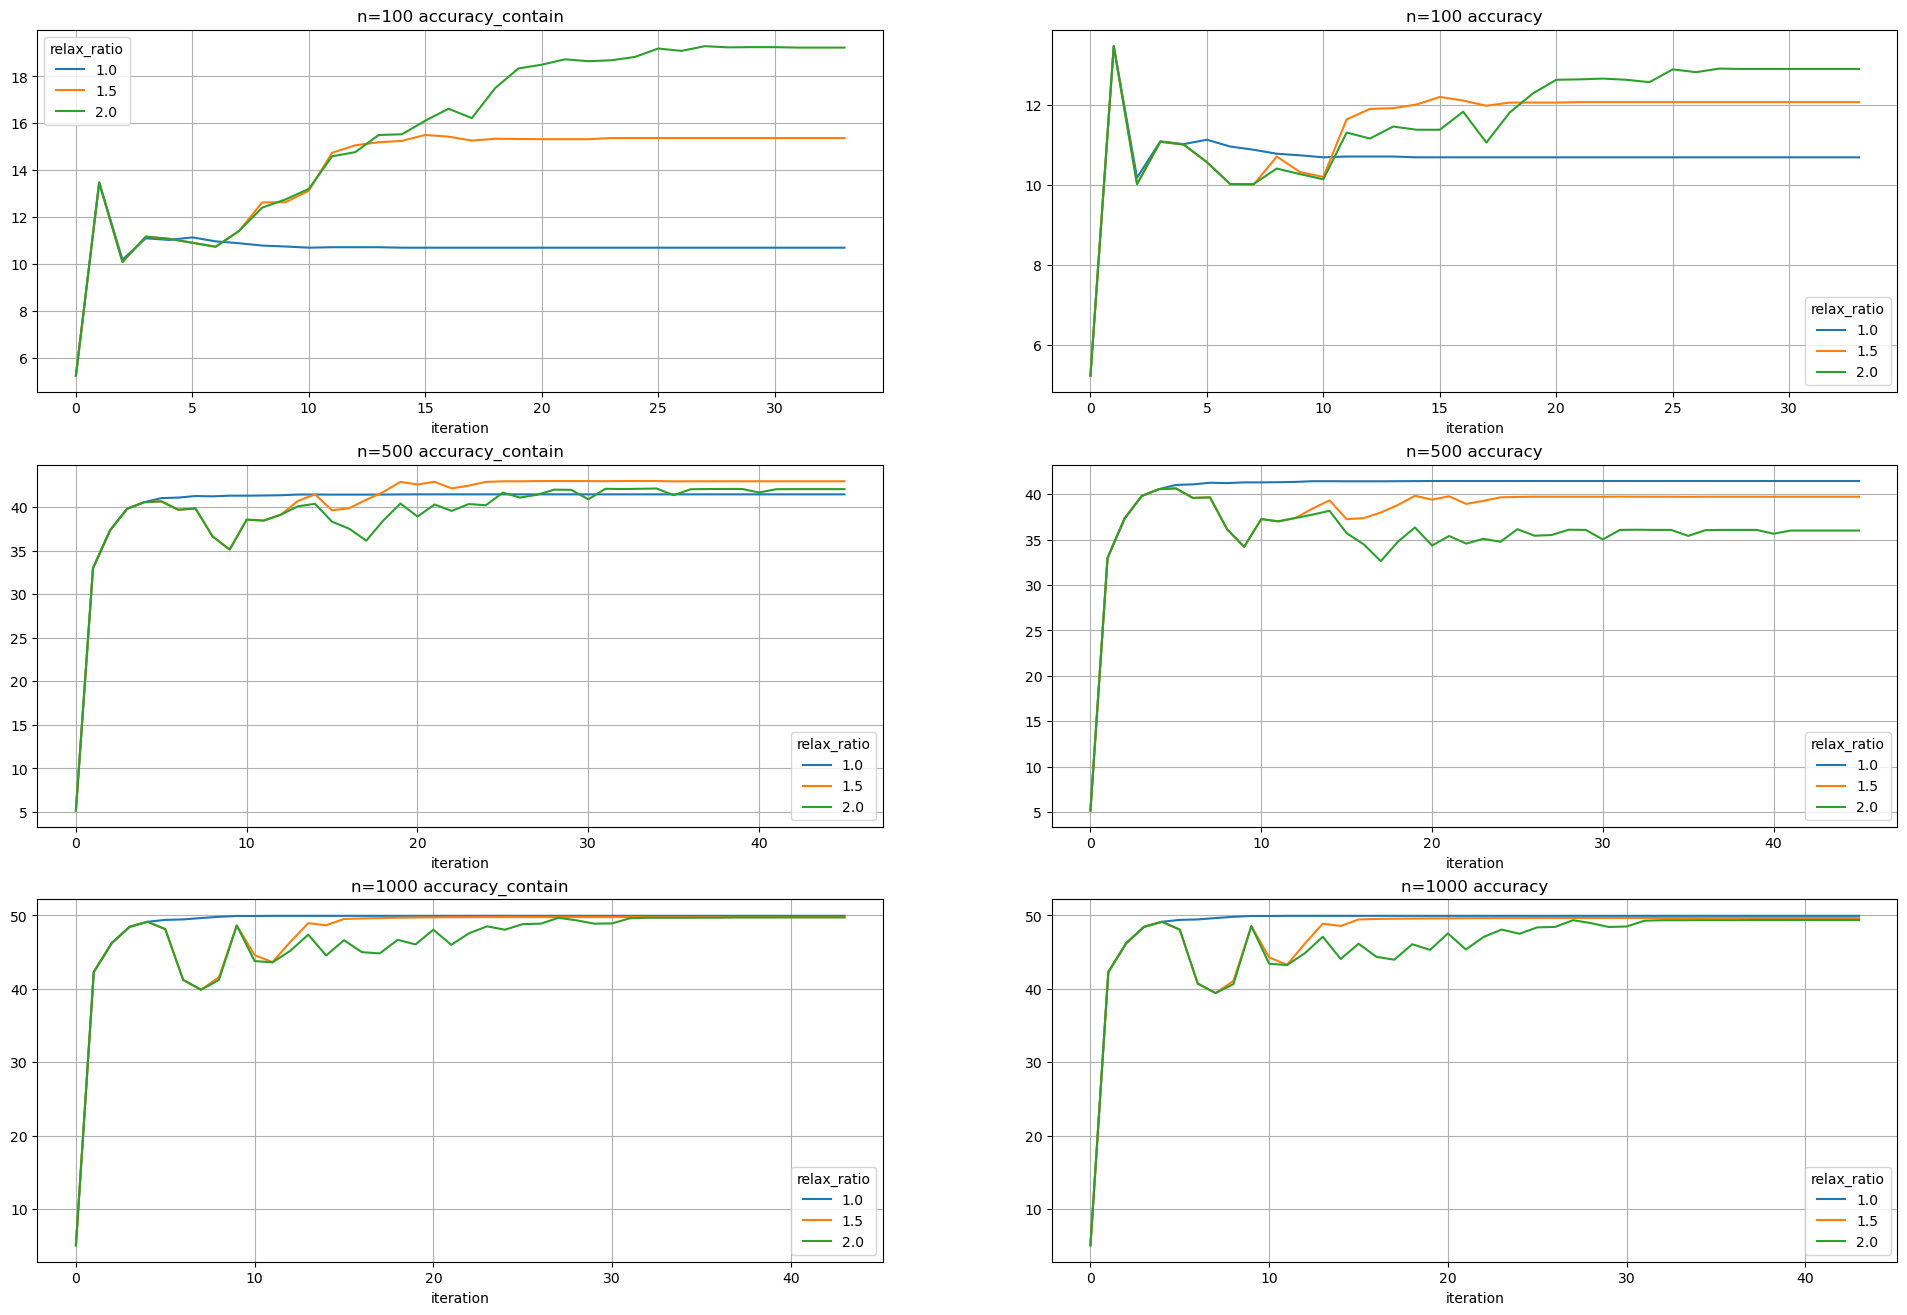

In [17]:
df = pd.read_csv("scope_relax_sparsity.csv")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 16))
for i, n in enumerate([100, 500, 1000]):
    for j, metric in enumerate(["accuracy_contain", "accuracy"]):
        df_tmp = df.loc[(df["n"] == n), ["seed", "iteration", "relax_ratio", metric]]
        all_combinations = pd.MultiIndex.from_product([
            df_tmp['seed'].unique(),
            df_tmp['iteration'].unique(),
            df_tmp['relax_ratio'].unique()
        ], names=['seed', 'iteration', 'relax_ratio'])
        all_combinations = pd.DataFrame(index=all_combinations).reset_index()
        merged_df = all_combinations.merge(df_tmp, how='left')
        tmp = merged_df.copy()
        merged_df[metric] = merged_df.groupby(['seed', 'relax_ratio'])[metric].fillna(method='ffill')
        merged_df = merged_df.reset_index()
        merged_df.groupby(['iteration', 'relax_ratio'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title="n=" + str(n) + " " + metric,
            grid=True,
        )

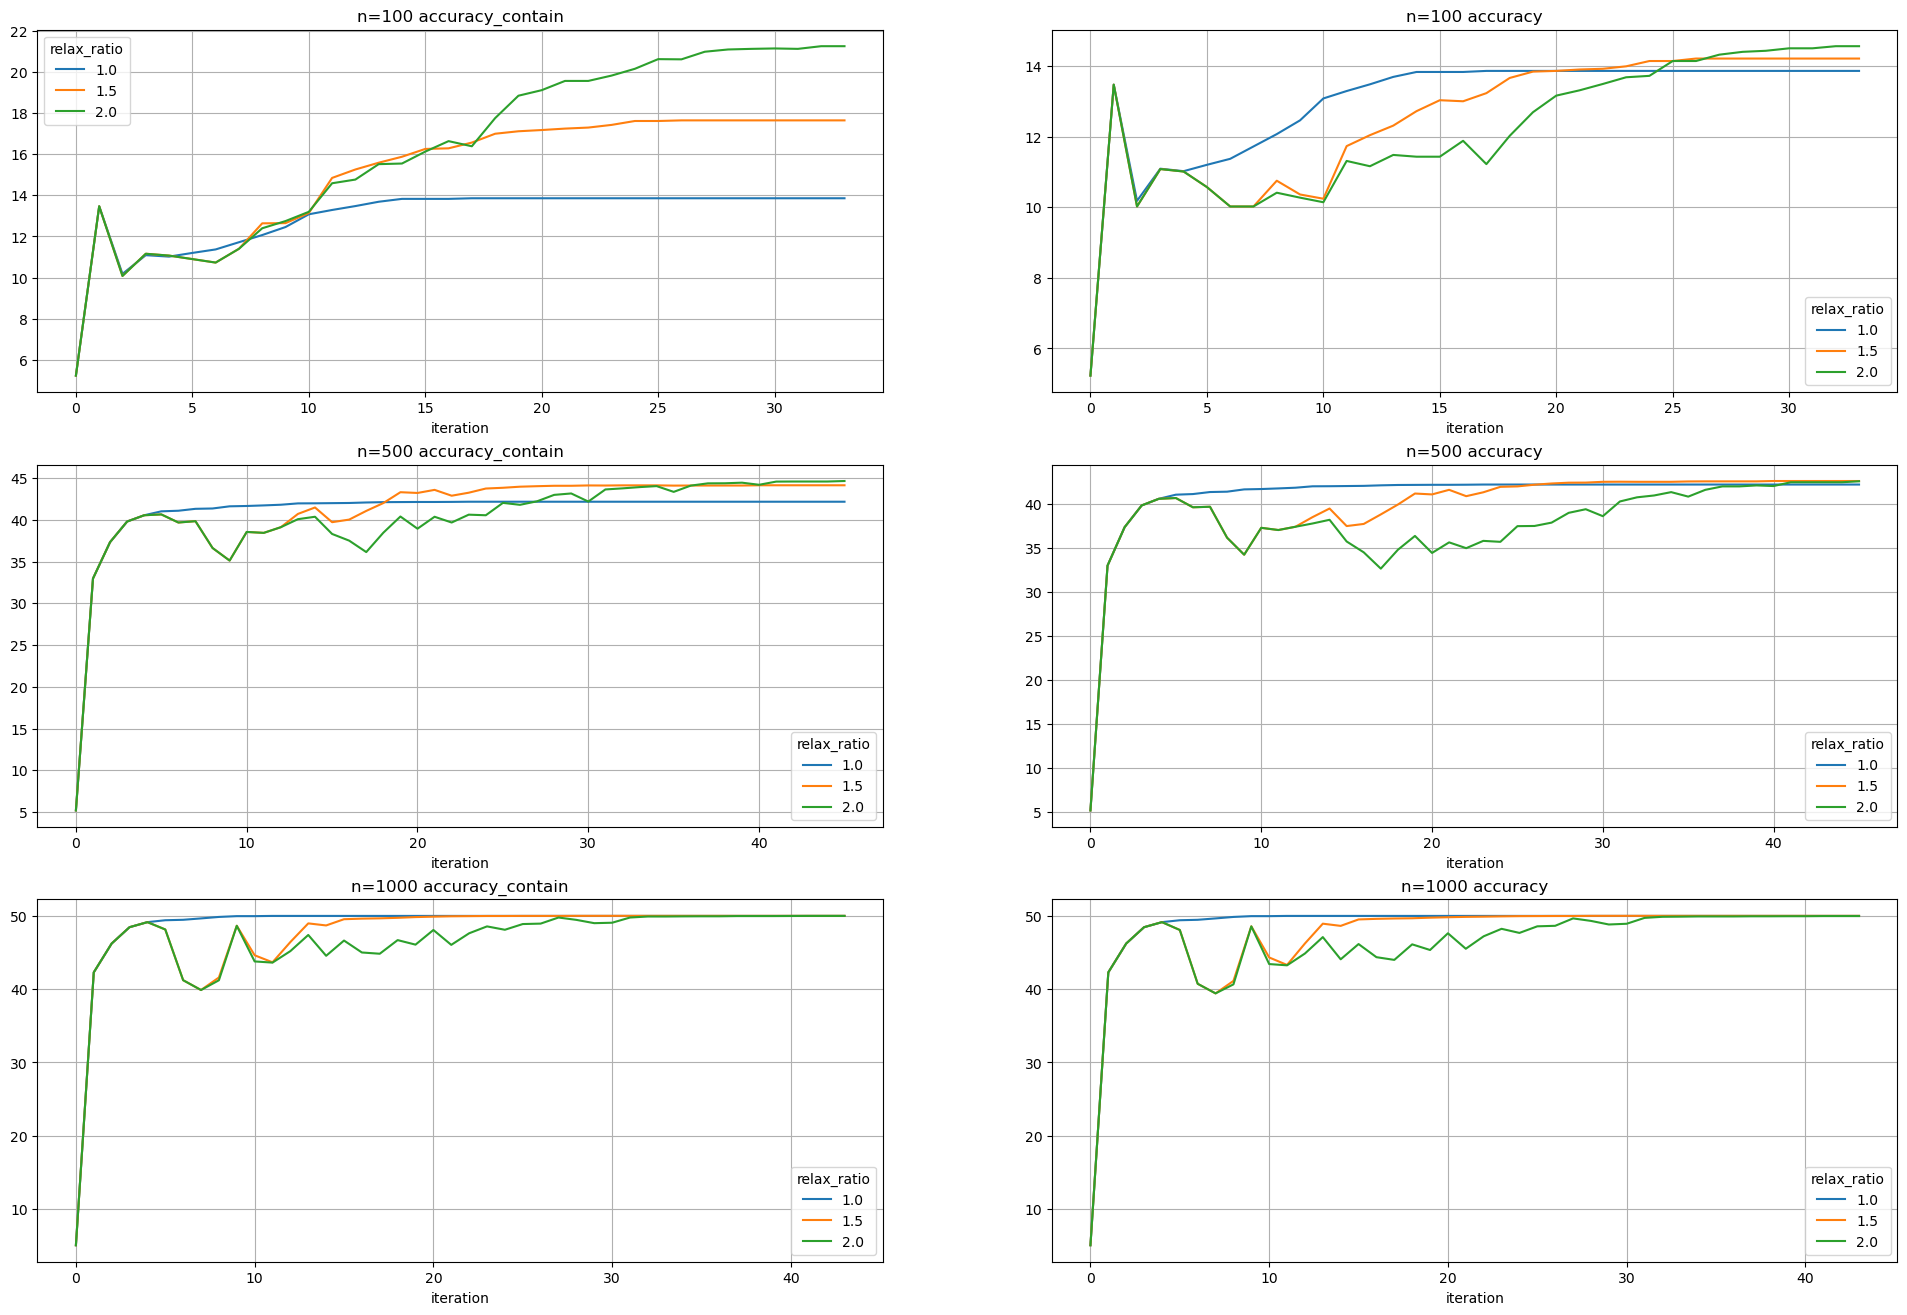

In [15]:
df = pd.read_csv("scope_relax_sparsity.csv")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 16))
for i, n in enumerate([100, 500, 1000]):
    for j, metric in enumerate(["accuracy_contain", "accuracy"]):
        df_tmp = df.loc[(df["n"] == n), ["seed", "iteration", "relax_ratio", metric]]
        all_combinations = pd.MultiIndex.from_product([
            df_tmp['seed'].unique(),
            df_tmp['iteration'].unique(),
            df_tmp['relax_ratio'].unique()
        ], names=['seed', 'iteration', 'relax_ratio'])
        all_combinations = pd.DataFrame(index=all_combinations).reset_index()
        merged_df = all_combinations.merge(df_tmp, how='left')
        tmp = merged_df.copy()
        merged_df[metric] = merged_df.groupby(['seed', 'relax_ratio'])[metric].transform(lambda x: x.fillna(x.max()))
        merged_df = merged_df.reset_index()
        merged_df.groupby(['iteration', 'relax_ratio'])[metric].mean().unstack().plot(
            ax=axes[i][j],
            title="n=" + str(n) + " " + metric,
            grid=True,
        )